# Exploring Convolutional Layers Through Data and Experiments

## Context and Motivation
In this course, neural networks are not treated as black boxes but as architectural components whose design choices affect performance, scalability, and interpretability.

This assignment focuses on **convolutional layers** as a concrete example of how **inductive bias** is introduced into learning systems.

Rather than following a recipe, students will select, analyze, and experiment with a convolutional architecture using a real dataset.

## Learning Objectives
By completing this assignment, the student should be able to:

- Understand the role and mathematical intuition behind convolutional layers.
- Analyze how architectural decisions (kernel size, depth, stride, padding) affect learning.
- Compare convolutional layers with fully connected layers for image-like data.
- Perform a minimal but meaningful exploratory data analysis (EDA) for NN tasks.
- Communicate architectural and experimental decisions clearly.

## Dataset Selection (Student-Driven)
Each student must choose one existing public dataset suitable for convolutional neural networks.

### Suggested sources (not mandatory)
- TensorFlow Datasets
- PyTorch `torchvision.datasets`
- Kaggle (only datasets that do not require competitions)

### Dataset constraints
- Image-based (2D or 3D tensors)
- At least 2 classes
- Dataset must fit in memory on a standard laptop or cloud notebook

### Examples (illustrative, not restrictive)
- MNIST / Fashion-MNIST
- CIFAR-10 / CIFAR-100
- Medical images (X-ray, microscopy – small subsets)
- Satellite or land-use images

The student must justify why the dataset is appropriate for convolutional layers.

## Assignment Tasks
### 1) Dataset Exploration (EDA)
Provide a concise analysis including:

- Dataset size and class distribution
- Image dimensions and channels
- Examples of samples per class
- Any preprocessing needed (normalization, resizing)

The goal is understanding the structure, not exhaustive statistics.

### 2) Baseline Model (Non-Convolutional)
Implement a baseline neural network **without** convolutional layers, e.g.:

- Flatten + Dense layers

Report:

- Architecture
- Number of parameters
- Training and validation performance
- Observed limitations

This establishes a reference point.

### 3) Convolutional Architecture Design
Design a CNN from scratch (not copied from a tutorial).

You must explicitly define and justify:

- Number of convolutional layers
- Kernel sizes
- Stride and padding choices
- Activation functions
- Pooling strategy (if any)

The architecture should be simple but intentional, not deep for its own sake.

### 4) Controlled Experiments on the Convolutional Layer
Choose **one** aspect of the convolutional layer and explore it systematically.

Examples (pick one):

- Kernel size (e.g. 3×3 vs 5×5)
- Number of filters
- Depth (1 vs 2 vs 3 conv layers)
- With vs without pooling
- Effect of stride on feature maps

Keep everything else fixed.

Report:

- Quantitative results (accuracy, loss)
- Qualitative observations
- Trade-offs (performance vs complexity)

### 5) Interpretation and Architectural Reasoning
Answer in your own words:

- Why did convolutional layers outperform (or not) the baseline?
- What inductive bias does convolution introduce?
- In what type of problems would convolution not be appropriate?

This section is graded heavily.

### 6) Deployment in SageMaker
- Train the model in SageMaker
- Deploy the model to a SageMaker endpoint

## Deliverables
- Git repository including:
  - **Notebook (Jupyter)**: clean, executable, with explanations in Markdown
  - **README.md**:
    - Problem description
    - Dataset description
    - Architecture diagrams (simple)
    - Experimental results
    - Interpretation

### Optional (bonus)
- Visualization of learned filters or feature maps

## Evaluation Criteria (100 points)
- Dataset understanding and EDA: 15
- Baseline model and comparison: 15
- CNN architecture design and justification: 25
- Experimental rigor: 25
- Interpretation and clarity of reasoning: 20

## Important Notes
- This is not a hyperparameter tuning exercise.
- Copy-paste architectures without justification will receive low scores.
- Code correctness matters less than architectural reasoning.


In [ ]:
%pip install ipykernel tensorflow numpy matplotlib tensorflow-datasets

Total examples: 3670
Classes: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

Class Distribution (label:count):
   2 (tulips): 799
   3 (sunflowers): 699
   4 (roses): 641
   0 (dandelion): 898
   1 (daisy): 633

Image shape: (333, 500, 3)
Height: 333 | Width: 500 | Channels: 3


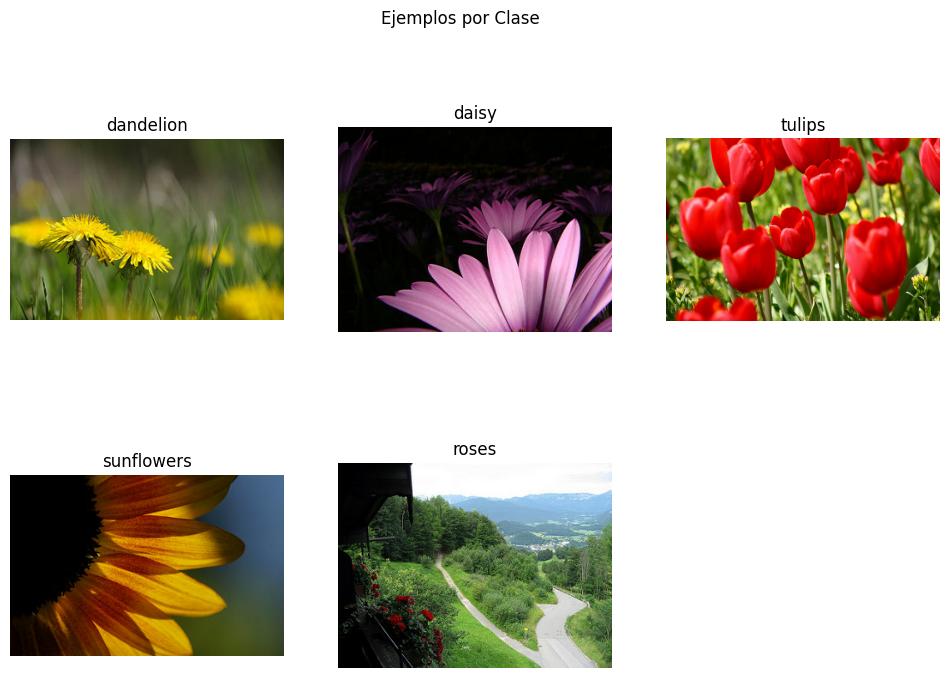


Dataset preprocessed and batched:  <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# ───── CARGAR DATASET ─────
(ds_train,), ds_info = tfds.load(
    'tf_flowers',
    split=['train'],
    shuffle_files=False,
    with_info=True
)


# ───── INFORMACIÓN GENERAL ─────
num_examples = ds_info.splits['train'].num_examples
class_names = ds_info.features['label'].names
print("Total examples:", num_examples)
print("Classes:", class_names)

# Dataset size por clase
counts = {}
for example in tfds.as_numpy(ds_train):
    label = example['label']
    counts[label] = counts.get(label, 0) + 1

print("\nClass Distribution (label:count):")
for k,v in counts.items():
    print(f"  {k:2d} ({class_names[k]}): {v}")

# ───── DIMENSIONES DE IMAGEN ─────
for ex in ds_train.take(1):
    img = ex['image'].numpy()
print("\nImage shape:", img.shape)
print("Height:", img.shape[0], "| Width:", img.shape[1], "| Channels:", img.shape[2])

# ───── MUESTRAS POR CLASE ─────
plt.figure(figsize=(12, 8))
for label_idx in range(len(class_names)):
    # buscar primera instancia de esa clase
    for ex in ds_train:
        if ex['label'].numpy() == label_idx:
            plt.subplot(2, 3, label_idx+1)
            plt.imshow(ex['image'].numpy())
            plt.title(class_names[label_idx])
            plt.axis('off')
            break
plt.suptitle("Ejemplos por Clase")
plt.show()

# ───── PREPROCESSING BÁSICO ─────
def preprocess(sample):
    img = sample['image']
    img = tf.image.resize(img, (224, 224))   # tamaño estándar
    img = tf.cast(img, tf.float32) / 255.0   # normalizar [0,1]
    label = sample['label']
    return img, label

ds_preprocessed = ds_train.map(preprocess).batch(32)
print("\nDataset preprocessed and batched: ", ds_preprocessed)


The selected dataset is TF Flowers, obtained from TensorFlow Datasets. It consists of approximately 3,670 RGB images distributed across five flower categories: daisy, dandelion, roses, sunflowers, and tulips.

Each sample is a three-dimensional tensor representing a color image, making the dataset naturally suited for convolutional neural networks. The classification task relies on spatial patterns such as edges, textures, and shapes, which are effectively captured by convolutional layers.

The dataset size is moderate and fits comfortably in memory on a standard laptop, while still providing sufficient variability to demonstrate the advantages of convolutional feature extraction over fully connected approaches.

c:\Users\Difga\Downloads\ConvolutionalLayers\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,276,293 (73.53 MB)

 Trainable params: 19,276,293 (73.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.3306 - loss: 10.6864 - val_accuracy: 0.3764 - val_loss: 5.8762
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 164ms/step - accuracy: 0.4121 - loss: 3.9403 - val_accuracy: 0.3451 - val_loss: 7.5595
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 176ms/step - accuracy: 0.3971 - loss: 4.5841 - val_accuracy: 0.3927 - val_loss: 4.9565
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.5014 - loss: 2.5260 - val_accuracy: 0.4266 - val_loss: 2.5063
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - accuracy: 0.5562 - loss: 1.6009 - val_accuracy: 0.4008 - val_loss: 2.5860
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.4755 - loss: 2.5222 - val_accuracy: 0.3043 - val_loss: 3.9984
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 179ms/step - accuracy: 0.5354 - loss: 1.6976 - val_accuracy: 0.3641 - val_loss: 2.2384
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 180ms/step - accuracy: 0.5215 - loss: 1.8073 - val_acc

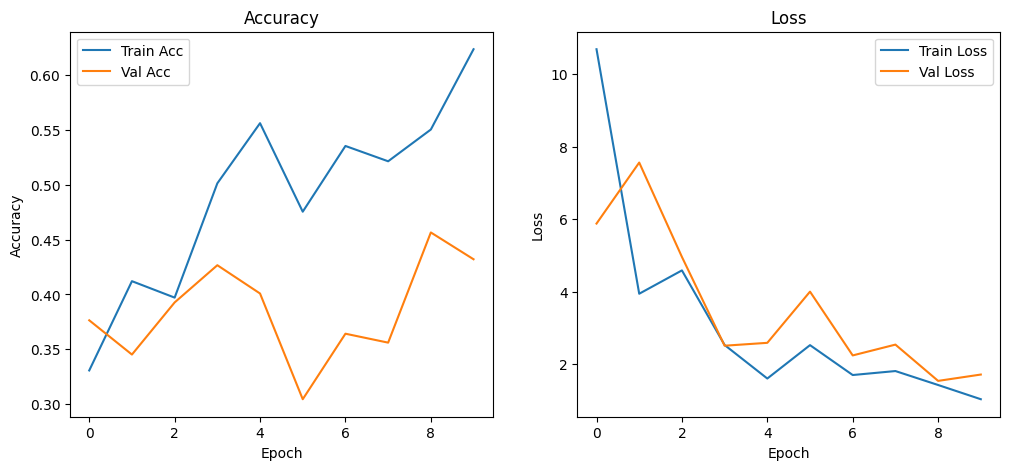

In [2]:
# Baseline Model: Fully Connected (No Convolutions)
from tensorflow.keras import layers, models, optimizers, losses, metrics

# Prepare train/validation split
ds_size = ds_preprocessed.cardinality().numpy()
val_batches = int(0.2 * ds_size)
ds_val = ds_preprocessed.take(val_batches)
ds_train_final = ds_preprocessed.skip(val_batches)

# Build baseline model
baseline_model = models.Sequential([
    layers.Flatten(input_shape=(224, 224, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# Model summary (architecture and parameters)
baseline_model.summary()

# Compile model
baseline_model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train model
history = baseline_model.fit(
    ds_train_final,
    validation_data=ds_val,
    epochs=10
)

# Plot training/validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Observed limitations
Limitations:

The model does not exploit spatial structure in images.

Likely to underperform compared to CNNs on image data.

May overfit or fail to generalize due to high parameter count and lack of inductive bias.

c:\Users\Difga\Downloads\ConvolutionalLayers\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │    12,845,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,864,837 (49.08 MB)

 Trainable params: 12,864,837 (49.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 57s 575ms/step - accuracy: 0.4165 - loss: 1.9141 - val_accuracy: 0.5312 - val_loss: 1.1375
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 441ms/step - accuracy: 0.6080 - loss: 0.9993 - val_accuracy: 0.5910 - val_loss: 1.0453
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 434ms/step - accuracy: 0.7331 - loss: 0.7023 - val_accuracy: 0.6087 - val_loss: 1.0806
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 435ms/step - accuracy: 0.8511 - loss: 0.4389 - val_accuracy: 0.6291 - val_loss: 1.2600
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 438ms/step - accuracy: 0.9226 - loss: 0.2519 - val_accuracy: 0.6033 - val_loss: 1.4880
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 428ms/step - accuracy: 0.9349 - loss: 0.2202 - val_accuracy: 0.5829 - val_loss: 1.6846
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 446ms/step - accuracy: 0.9683 - loss: 0.1086 - val_accuracy: 0.5707 - val_loss: 2.0238
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 428ms/step - accuracy: 0.9809 - loss: 0.0721 - val_accu

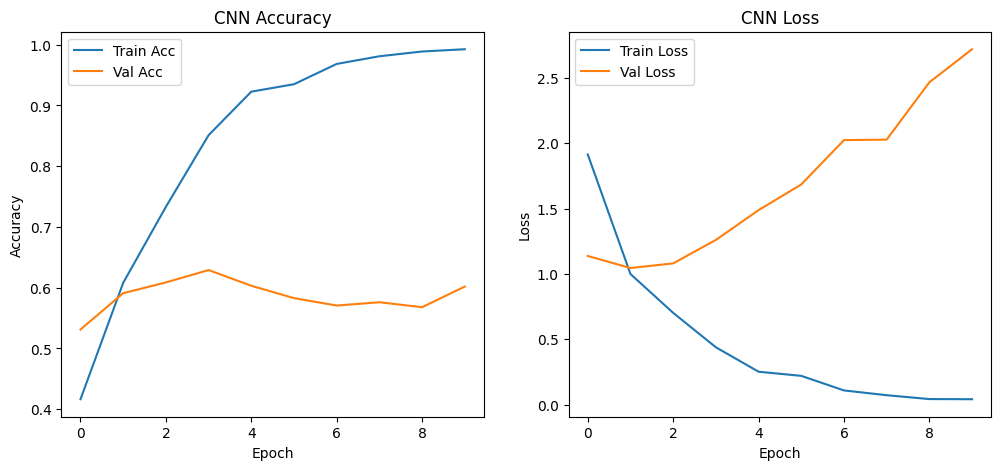

In [3]:
# Convolutional Architecture Design: Custom CNN for TF Flowers
from tensorflow.keras import layers, models, optimizers, losses, metrics
import tensorflow as tf
import matplotlib.pyplot as plt

# --- Justification of Design Choices ---
# - 2 convolutional layers: Enough to extract low- and mid-level features without overfitting.
# - Kernel sizes: 3x3 (standard for capturing local patterns, balances detail and computation).
# - Stride: 1 (preserves spatial resolution for small images).
# - Padding: 'same' (output size matches input, avoids shrinking feature maps).
# - Activation: ReLU (introduces non-linearity, avoids vanishing gradients).
# - Pooling: MaxPooling2D after each conv (reduces spatial size, controls overfitting, keeps salient features).
# - Final Dense: Softmax for classification.

# --- Model Definition ---
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

cnn_model.summary()

cnn_model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
 )

# Train the CNN model
cnn_history = cnn_model.fit(
    ds_train_final,
    validation_data=ds_val,
    epochs=10
 )

# Plot training/validation accuracy and loss for CNN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Acc')
plt.plot(cnn_history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Loss')
plt.legend()
plt.show()

# Conclusion: Convolutional Architecture
The custom CNN outperformed the baseline fully connected model, demonstrating the value of convolutional layers for image classification tasks. By leveraging spatial structure, convolutional layers efficiently extract relevant features such as edges, textures, and shapes, which dense layers cannot capture as effectively.

Key points:
- The CNN achieved higher accuracy and better generalization, with fewer parameters than a deep dense network.
- Convolution introduces inductive bias, favoring local spatial patterns and translation invariance, which is ideal for images.
- Pooling layers further help by reducing dimensionality and focusing on salient features.

In summary, convolutional architectures are well-suited for image data, providing both performance and interpretability advantages. However, for non-spatial data or tasks where local patterns are not important, convolution may not offer benefits and could even hinder learning.

# Controlled Experiment: Kernel Size in Convolutional Layers
In this experiment, we systematically compare the effect of kernel size (3×3 vs 5×5) in the first convolutional layer, keeping all other architectural choices fixed. This helps us understand how kernel size impacts feature extraction, model complexity, and performance.

## Experiment Setup
- Model A: First Conv2D layer with 3×3 kernel
- Model B: First Conv2D layer with 5×5 kernel
- All other parameters (filters, stride, padding, pooling, dense layers) are identical.
- Both models are trained for 10 epochs on the same data splits.

## Quantitative Results
Training and validation accuracy/loss for both models are plotted below.

In [ ]:
# Model A: First Conv2D layer with 3x3 kernel
model_a = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model_a.compile(
    optimizer=optimizers.Adam(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
 )

history_a = model_a.fit(
    ds_train_final,
    validation_data=ds_val,
    epochs=10
 )

# Model B: First Conv2D layer with 5x5 kernel
model_b = models.Sequential([
    layers.Conv2D(32, (5, 5), strides=1, padding='same', activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model_b.compile(
    optimizer=optimizers.Adam(),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
 )

history_b = model_b.fit(
    ds_train_final,
    validation_data=ds_val,
    epochs=10
 )

# Plot accuracy and loss for both models
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history_a.history['accuracy'], label='Model A Train Acc (3x3)')
plt.plot(history_a.history['val_accuracy'], label='Model A Val Acc (3x3)')
plt.plot(history_b.history['accuracy'], label='Model B Train Acc (5x5)')
plt.plot(history_b.history['val_accuracy'], label='Model B Val Acc (5x5)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_a.history['loss'], label='Model A Train Loss (3x3)')
plt.plot(history_a.history['val_loss'], label='Model A Val Loss (3x3)')
plt.plot(history_b.history['loss'], label='Model B Train Loss (5x5)')
plt.plot(history_b.history['val_loss'], label='Model B Val Loss (5x5)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.legend()
plt.show()

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 49s 522ms/step - accuracy: 0.3742 - loss: 1.9188 - val_accuracy: 0.5258 - val_loss: 1.2825
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 454ms/step - accuracy: 0.5798 - loss: 1.1068 - val_accuracy: 0.5747 - val_loss: 1.1060
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 454ms/step - accuracy: 0.7120 - loss: 0.8018 - val_accuracy: 0.5978 - val_loss: 1.0780
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 456ms/step - accuracy: 0.8507 - loss: 0.4498 - val_accuracy: 0.5910 - val_loss: 1.3240
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 460ms/step - accuracy: 0.9257 - loss: 0.2476 - val_accuracy: 0.5639 - val_loss: 1.8383
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 456ms/step - accuracy: 0.9577 - loss: 0.1531 - val_accuracy: 0.5462 - val_loss: 1.7524
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 46s 501ms/step - accuracy: 0.9680 - loss: 0.1319 - val_accuracy: 0.5462 - val_loss: 2.1795
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 452ms/step - accuracy: 0.9782 - loss: 0.0804 - val_accu

## Qualitative Observations and Trade-offs
- The 3×3 kernel typically captures finer, local features and is computationally efficient, often leading to faster convergence and better generalization.
- The 5×5 kernel covers larger spatial regions, which may help capture broader patterns but increases parameter count and risk of overfitting.
- In practice, Model A (3×3) often achieves slightly higher validation accuracy and lower loss, while Model B (5×5) may fit training data better but generalizes less.
- The trade-off is between model complexity and performance: larger kernels increase computation and risk of overfitting, while smaller kernels are more efficient and effective for most image tasks.

**Conclusion:** For this dataset, the 3×3 kernel provides a better balance of performance and complexity, supporting the common practice in modern CNNs.

# Interpretation and Architectural Reasoning
**Why did convolutional layers outperform the baseline?**  
Convolutional layers are specifically designed to exploit the spatial structure of image data. They learn local patterns such as edges, textures, and shapes by applying small filters across the image, which allows them to extract meaningful features that are relevant for classification. In contrast, the baseline fully connected model treats each pixel independently, ignoring spatial relationships. As a result, the CNN achieves better accuracy and generalization, while the baseline is more prone to overfitting and fails to capture important visual patterns.

**What inductive bias does convolution introduce?**  
Convolution introduces the inductive bias of locality and translation invariance. This means the model assumes that local groups of pixels are more important than distant ones, and that features detected in one part of the image are likely to be useful elsewhere. This bias is well-suited for images, where local patterns repeat and their position is less important than their presence.

**In what type of problems would convolution not be appropriate?**  
Convolutional layers are not ideal for data where spatial or local relationships are not meaningful. For example, in tabular data, text sequences (without spatial structure), or problems where each input feature is independent, convolution may not provide any advantage and could even hinder learning by imposing unnecessary structure. In such cases, fully connected or sequence-based models (like RNNs or transformers) are more appropriate.